# ***Basic image manipulations***
#### Accessing and manipulating images pixels
#### Image resizing
#### Cropping
#### Flipping

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/rys6f1vprily2bg/opencv_bootcamp_assets_NB2.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB2.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

# Original checkerboard image

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

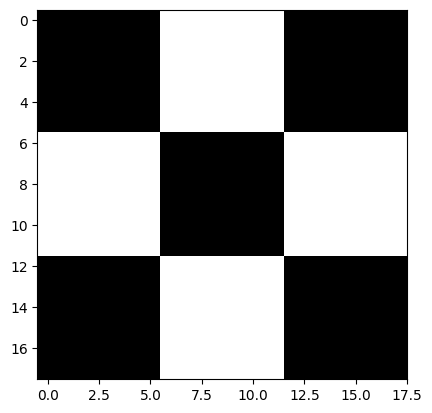

In [6]:
cb_img = cv2.imread('checkerboard_18x18.png',0)
print(cb_img)
print(cb_img.shape)
plt.imshow(cb_img,cmap='gray')

# Accessing individual pixels

In [8]:
#the first pixel
print(cb_img[0][0])
#the first white pixel
print(cb_img[0][6])

0
255


# Modifying image pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0 200 200   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0 200 200   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 200 200   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

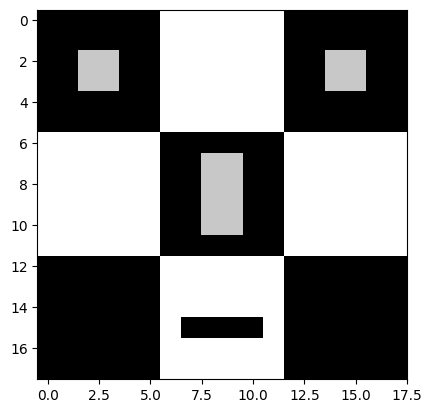

In [19]:
cb_copy = cb_img.copy()
cb_copy[2][2]=200
cb_copy[2][3]=200
cb_copy[3][2]=200
cb_copy[3][3]=200

cb_copy[2][14]=200
cb_copy[2][15]=200
cb_copy[3][14]=200
cb_copy[3][15]=200

cb_copy[7][8]=200
cb_copy[7][9]=200
cb_copy[8][8]=200
cb_copy[8][9]=200
cb_copy[9][8]=200
cb_copy[9][9]=200
cb_copy[10][8]=200
cb_copy[10][9]=200

cb_copy[-3][7]=0
cb_copy[-3][8]=0
cb_copy[-3][9]=0
cb_copy[-3][10]=0




print(cb_copy)
plt.imshow(cb_copy,cmap='gray')

# Cropping Images

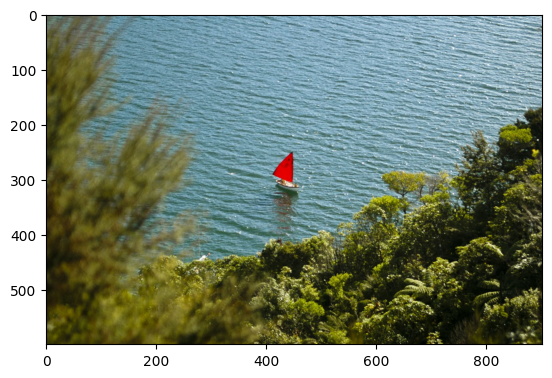

In [22]:
nz_boat_bgr=cv2.imread('New_Zealand_Boat.jpg',cv2.IMREAD_COLOR)
# nz_boat_rgb = nz_boat_bgr[:,:,::-1]# using slicing
nz_boat_rgb = cv2.cvtColor(nz_boat_bgr,cv2.COLOR_BGR2RGB)# using function
plt.imshow(nz_boat_rgb)



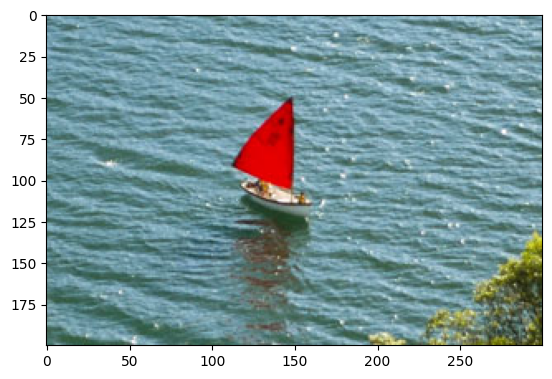

In [24]:
# now cropping
cropped_nz_boat = nz_boat_rgb[200:400,300:600]
plt.imshow(cropped_nz_boat)

# Resizing images

In [36]:
cropped_nz_boat.shape

(200, 300, 3)

### resizing with scaling factors fx and fy
### fx is for scaling width and fy is for height
### here scaling factor 2 means it doubles the initial dimension

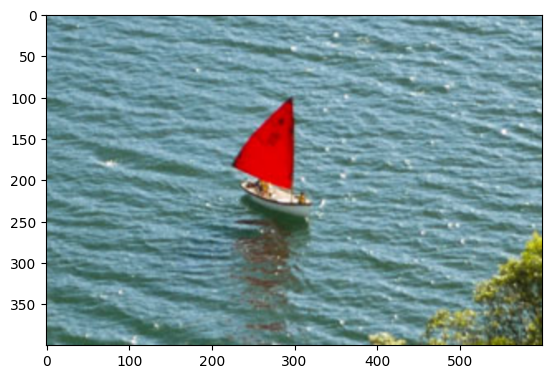

In [29]:
cropped_nz_boat_2x = cv2.resize(cropped_nz_boat,None,fx=2,fy=2)
plt.imshow(cropped_nz_boat_2x)

In [37]:
cropped_nz_boat_2x.shape

(400, 600, 3)

## resizing with output image dimension

(200, 200, 3)


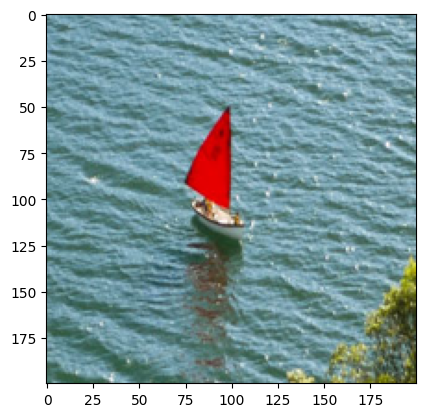

In [35]:
resized_nz_boat = cv2.resize(cropped_nz_boat,(200,200))
plt.imshow(resized_nz_boat)
print(resized_nz_boat.shape)

(400, 200, 3)


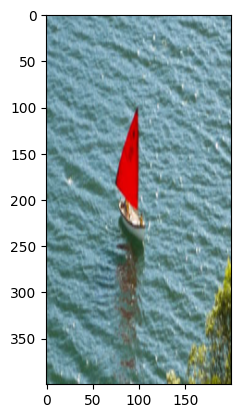

In [38]:
resized_nz_boat_1 = cv2.resize(cropped_nz_boat,(200,400))
plt.imshow(resized_nz_boat_1)
print(resized_nz_boat_1.shape)

# ***FLIP***
### 1 - flips horizontaly
### 0 - flips verticaly
### -1 - flips both directions


Text(0.5, 1.0, 'Original')

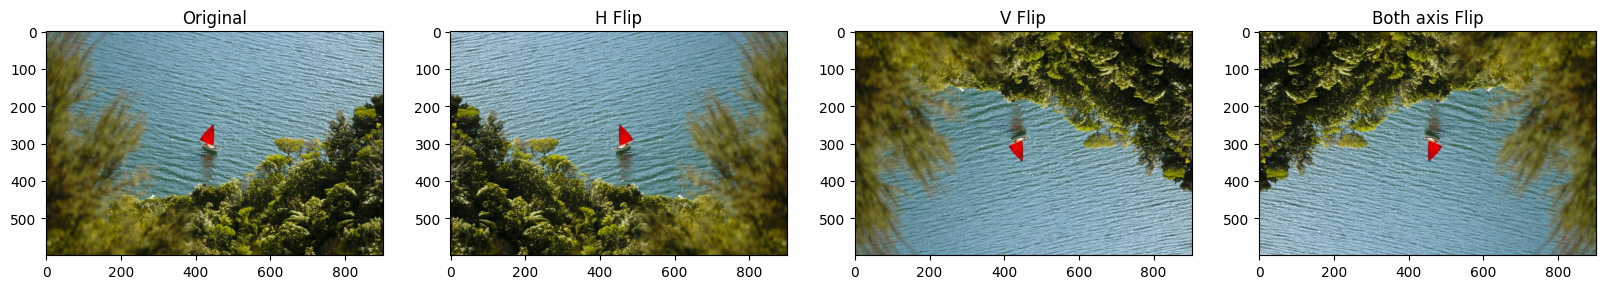

In [41]:
nz_boat_flit_horz = cv2.flip(nz_boat_rgb,1)
nz_boat_flit_vert = cv2.flip(nz_boat_rgb,0)
nz_boat_flit_both = cv2.flip(nz_boat_rgb,-1)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(nz_boat_rgb);plt.title('Original')
plt.subplot(142);plt.imshow(nz_boat_flit_horz);plt.title('H Flip')
plt.subplot(143);plt.imshow(nz_boat_flit_vert);plt.title('V Flip')
plt.subplot(144);plt.imshow(nz_boat_flit_both);plt.title('Both axis Flip')

